In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("weather.db")
daily_df = pd.read_sql_query("SELECT * FROM daily_df", conn, parse_dates=["date"])

daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           3986 non-null   int64         
 1   date            3986 non-null   datetime64[ns]
 2   temperature_2m  3986 non-null   float64       
 3   rain            3986 non-null   float64       
 4   snowfall        3986 non-null   float64       
 5   wind_speed_10m  3986 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.0 KB


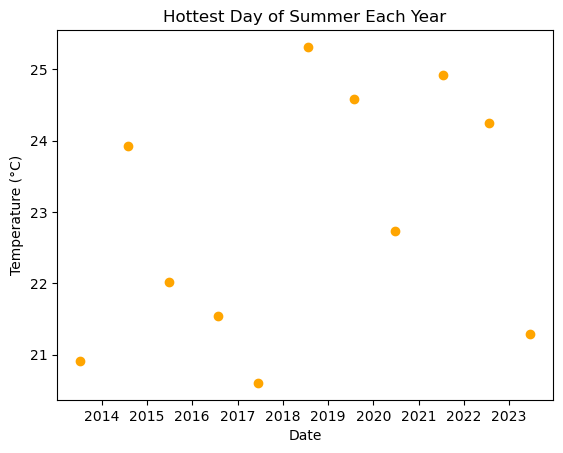

         date  temperature_2m
0  2013-07-07       20.915001
1  2014-08-04       23.923334
2  2015-07-02       22.019167
3  2016-07-25       21.537918
4  2017-06-18       20.604584
5  2018-07-26       25.312918
6  2019-07-28       24.585833
7  2020-06-24       22.735834
8  2021-07-15       24.921249
9  2022-07-21       24.252501
10 2023-06-22       21.285833


In [6]:
# Find the hottest summer day for each year
summer_data = daily_df[daily_df['date'].dt.month.isin([6, 7, 8])]

hottest_days = summer_data.loc[summer_data.groupby(summer_data['date'].dt.year)['temperature_2m'].idxmax()]

hottest_days = hottest_days[['date', 'temperature_2m']].reset_index(drop=True)

plt.scatter(hottest_days['date'], hottest_days['temperature_2m'], color='orange', label='Hottest Day')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Hottest Day of Summer Each Year')

plt.show()

print(hottest_days)

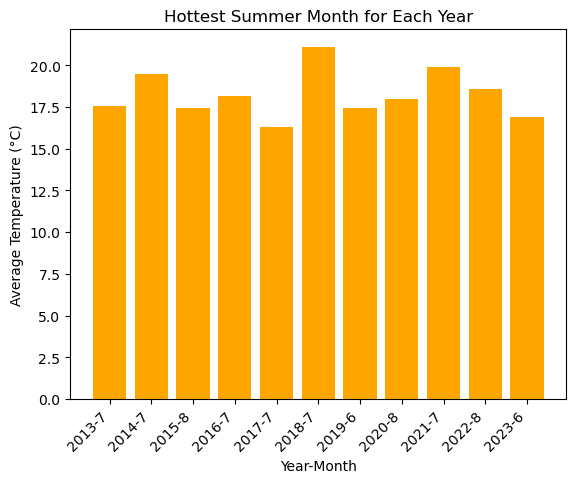

    year  month  temperature_2m
1   2013      7       17.550484
4   2014      7       19.489328
8   2015      8       17.428979
10  2016      7       18.139463
13  2017      7       16.269301
16  2018      7       21.083415
18  2019      6       17.422361
23  2020      8       17.956936
25  2021      7       19.873938
29  2022      8       18.587514
30  2023      6       16.883820


In [15]:
# Find the hottest summer month for each year
summer_data = daily_df[daily_df['date'].dt.month.isin([6, 7, 8])].copy()

summer_data['year'] = summer_data['date'].dt.year
summer_data['month'] = summer_data['date'].dt.month

average_monthly_temperature = summer_data.groupby(['year', 'month'])['temperature_2m'].mean().reset_index()

max_temp_month_per_year = average_monthly_temperature.loc[average_monthly_temperature.groupby('year')['temperature_2m'].idxmax()]

max_temp_month_per_year['year_month'] = max_temp_month_per_year['year'].astype(str) + '-' + max_temp_month_per_year['month'].astype(str)

plt.bar(max_temp_month_per_year['year_month'], max_temp_month_per_year['temperature_2m'], color='orange', label='Hottest Month')

plt.xlabel('Year-Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Hottest Summer Month for Each Year')
plt.xticks(rotation=45, ha='right')

plt.show()
print(max_temp_month_per_year[['year', 'month', 'temperature_2m']])

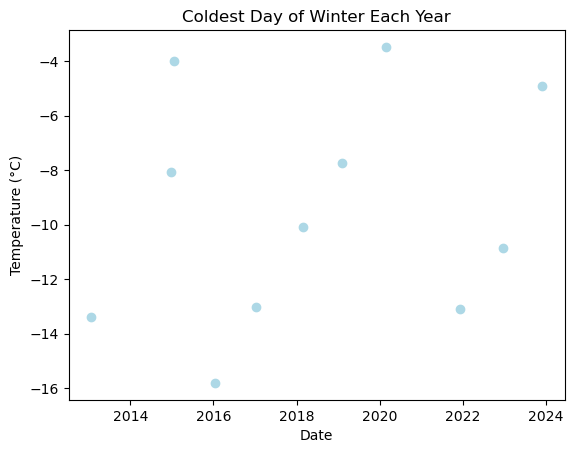

         date  temperature_2m
0  2013-01-23      -13.374584
1  2014-12-28       -8.062083
2  2015-01-23       -4.012084
3  2016-01-15      -15.812083
4  2017-01-05      -13.028750
5  2018-02-27      -10.070416
6  2019-02-04       -7.751667
7  2020-02-28       -3.478750
8  2021-12-07      -13.112083
9  2022-12-15      -10.847501
10 2023-11-27       -4.899583


In [14]:
# Find the coldest winter day for each year
winter_data = daily_df[daily_df['date'].dt.month.isin([9, 10, 11, 12, 1, 2])]

coldest_days = winter_data.loc[winter_data.groupby(winter_data['date'].dt.year)['temperature_2m'].idxmin()]

coldest_days = coldest_days[['date', 'temperature_2m']].reset_index(drop=True)

plt.scatter(coldest_days['date'], coldest_days['temperature_2m'], color='lightblue', label='Coldest Day')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Coldest Day of Winter Each Year')

plt.show()
print(coldest_days)

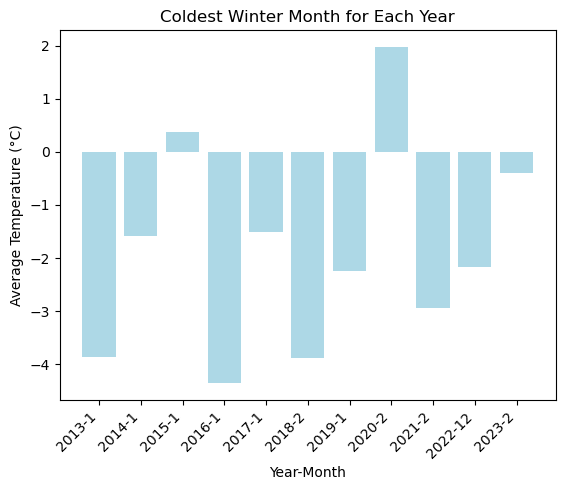

    year  month  temperature_2m
0   2013      1       -3.875188
6   2014      1       -1.593468
12  2015      1        0.361909
18  2016      1       -4.357581
24  2017      1       -1.514906
31  2018      2       -3.891324
36  2019      1       -2.243065
43  2020      2        1.973621
49  2021      2       -2.944301
59  2022     12       -2.174516
61  2023      2       -0.397128


In [9]:
# Find the coldest winter month for each year
winter_data = daily_df[daily_df['date'].dt.month.isin([9, 10, 11, 12, 1, 2])].copy()

winter_data['year'] = winter_data['date'].dt.year
winter_data['month'] = winter_data['date'].dt.month

average_monthly_temperature = winter_data.groupby(['year', 'month'])['temperature_2m'].mean().reset_index()

min_temp_month_per_year = average_monthly_temperature.loc[average_monthly_temperature.groupby('year')['temperature_2m'].idxmin()]

min_temp_month_per_year['year_month'] = min_temp_month_per_year['year'].astype(str) + '-' + min_temp_month_per_year['month'].astype(str)

plt.bar(min_temp_month_per_year['year_month'], min_temp_month_per_year['temperature_2m'], color='lightblue', label='Coldest Month')

plt.xlabel('Year-Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Coldest Winter Month for Each Year')
plt.xticks(rotation=45, ha='right')

plt.show()
print(min_temp_month_per_year[['year', 'month', 'temperature_2m']])

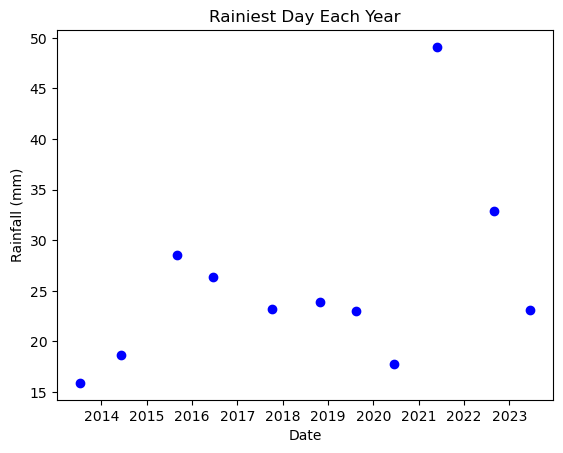

         date       rain
0  2013-07-10  15.900000
1  2014-06-12  18.700001
2  2015-09-06  28.500000
3  2016-06-18  26.400000
4  2017-10-08  23.200001
5  2018-10-30  23.900000
6  2019-08-18  23.000000
7  2020-06-16  17.799999
8  2021-05-26  49.099998
9  2022-08-28  32.900002
10 2023-06-20  23.100000


In [10]:
# Find the rainiest day for each year
rainiest_days = daily_df.loc[daily_df.groupby(daily_df['date'].dt.year)['rain'].idxmax()]

rainiest_days = rainiest_days[['date', 'rain']].reset_index(drop=True)

plt.scatter(rainiest_days['date'], rainiest_days['rain'], color='blue', label='Rainiest Day')

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainiest Day Each Year')

plt.show()
print(rainiest_days)

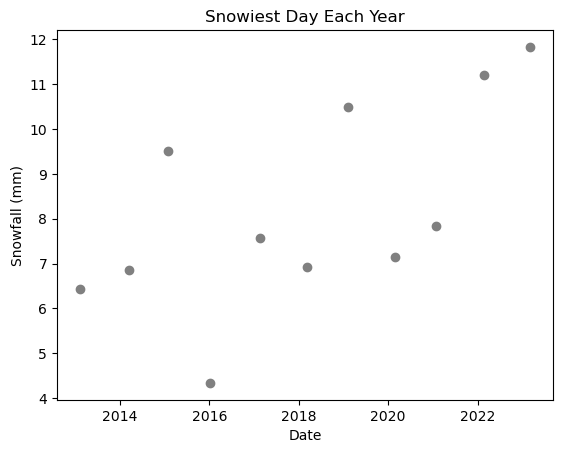

         date  snowfall
0  2013-02-06      6.44
1  2014-03-19      6.86
2  2015-01-31      9.52
3  2016-01-11      4.34
4  2017-02-22      7.56
5  2018-03-13      6.93
6  2019-02-03     10.50
7  2020-02-27      7.14
8  2021-01-28      7.84
9  2022-02-21     11.20
10 2023-03-08     11.83


In [11]:
# Find the snowiest day for each year
snowiest_days = daily_df.loc[daily_df.groupby(daily_df['date'].dt.year)['snowfall'].idxmax()]

snowiest_days = snowiest_days[['date', 'snowfall']].reset_index(drop=True)

plt.scatter(snowiest_days['date'], snowiest_days['snowfall'], color='grey', label='Snowiest Day')

plt.xlabel('Date')
plt.ylabel('Snowfall (mm)')
plt.title('Snowiest Day Each Year')

plt.show()
print(snowiest_days)

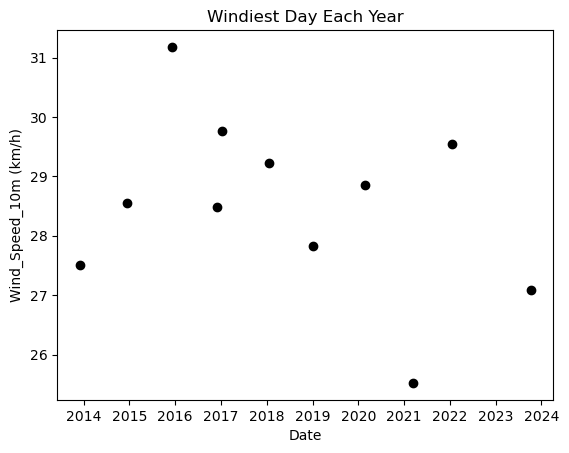

         date  wind_speed_10m
0  2013-12-01       27.500845
1  2014-12-10       28.554110
2  2015-12-06       31.179337
3  2016-11-27       28.476980
4  2017-01-11       29.768839
5  2018-01-16       29.230192
6  2019-01-02       27.820642
7  2020-02-22       28.860682
8  2021-03-11       25.522055
9  2022-01-20       29.544098
10 2023-10-07       27.089005


In [13]:
# Find the windiest day for each year
windiest_days = daily_df.loc[daily_df.groupby(daily_df['date'].dt.year)['wind_speed_10m'].idxmax()]

windiest_days = windiest_days[['date', 'wind_speed_10m']].reset_index(drop=True)

plt.scatter(windiest_days['date'], windiest_days['wind_speed_10m'], color='black', label='Windiest Day')

plt.xlabel('Date')
plt.ylabel('Wind_Speed_10m (km/h)')
plt.title('Windiest Day Each Year')

plt.show()
print(windiest_days)